# Dataset creation

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os, sys
from typing import *
from sklearn.model_selection import train_test_split 
import torch
sys.path.append('../src/')

In [4]:
from models.lib.data import *
from models.lib.neural import *

In [79]:
def _generate_stratified_dataset(
    dataset_files: List[str], 
    label_files: List[str],
    class_label: str,
    test_prop: float=0.2,
) -> Tuple[Dataset, Dataset]:
    
    train_datasets = []
    val_datasets = []
    test_datasets = []

    for datafile, labelfile in zip(dataset_files, label_files):
        # Read in current labelfile
        current_labels = pd.read_csv(labelfile).loc[:, class_label]
        
        # Make stratified split on labels
        # Since we are using labels this returns indices, which we then pass to the GeneExpressionDataset class
        trainsplit, testsplit = train_test_split(current_labels, stratify=current_labels, test_size=test_prop)
        trainsplit, valsplit = train_test_split(trainsplit, stratify=trainsplit, test_size=1.25*test_prop)
        
        # Generate train/test with stratified indices
        trainset = GeneExpressionData(
            filename=datafile, 
            labelname=labelfile,
            class_label=class_label,
            indices=trainsplit.index 
        )
        
        valset = GeneExpressionData(
            filename=datafile, 
            labelname=labelfile,
            class_label=class_label,
            indices=valsplit.index 
        )
        
        testset = GeneExpressionData(
            filename=datafile,
            labelname=labelfile,
            class_label=class_label,
            indices=testsplit.index,
        )
        
        train_datasets.append(trainset)
        val_datasets.append(valset)
        test_datasets.append(testset)
            
    train = torch.utils.data.ConcatDataset(train_datasets)
    val = torch.utils.data.ConcatDataset(val_datasets)
    test = torch.utils.data.ConcatDataset(test_datasets)
    
    return train, test, val


In [80]:
train, test, val = _generate_stratified_dataset(
    dataset_files=['../data/processed/primary.csv'],
    label_files=['../data/processed/meta_primary_labels.csv'],
    class_label='Subtype'
)

In [81]:
len(train), len(test), len(val)

(113645, 37882, 37882)

In [83]:
trainlabels = [y for X, y in train]
testlabels = [y for X, y in test]
vallabels = [y for X, y in val]

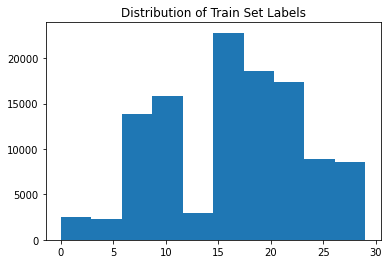

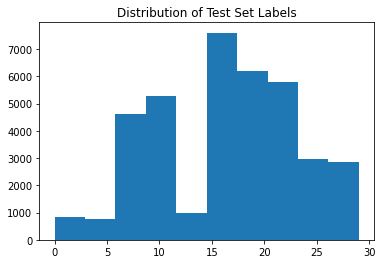

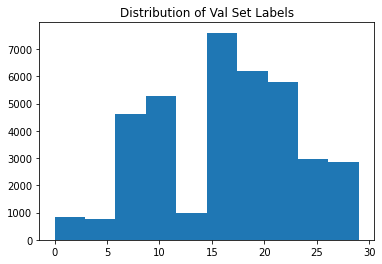

In [89]:
import matplotlib.pyplot as plt 

for data, name in zip([trainlabels, testlabels, vallabels], ['Train', 'Test', 'Val']):
    plt.hist(data)
    plt.title(f'Distribution of {name} Set Labels')
    plt.show()


In [91]:
train, test

(<torch.utils.data.dataset.ConcatDataset at 0x7f92f0c220a0>,
 <torch.utils.data.dataset.ConcatDataset at 0x7f8e7ba799a0>)

In [95]:
trainlabels

[10,
 21,
 29,
 22,
 15,
 8,
 21,
 5,
 22,
 8,
 15,
 10,
 10,
 27,
 22,
 21,
 23,
 27,
 19,
 20,
 1,
 17,
 29,
 15,
 10,
 23,
 22,
 10,
 10,
 15,
 8,
 10,
 29,
 15,
 1,
 15,
 17,
 10,
 29,
 10,
 6,
 20,
 15,
 24,
 9,
 21,
 23,
 26,
 10,
 25,
 15,
 1,
 15,
 15,
 20,
 10,
 10,
 15,
 23,
 15,
 23,
 23,
 22,
 15,
 20,
 20,
 10,
 11,
 15,
 18,
 10,
 26,
 23,
 29,
 21,
 26,
 26,
 22,
 27,
 20,
 21,
 6,
 8,
 26,
 15,
 24,
 20,
 9,
 19,
 10,
 21,
 12,
 15,
 27,
 15,
 20,
 26,
 15,
 8,
 15,
 29,
 9,
 3,
 21,
 29,
 8,
 25,
 29,
 17,
 7,
 21,
 13,
 22,
 8,
 10,
 22,
 15,
 21,
 15,
 20,
 4,
 23,
 21,
 26,
 22,
 15,
 20,
 5,
 22,
 19,
 16,
 20,
 29,
 15,
 19,
 19,
 1,
 20,
 26,
 8,
 29,
 21,
 10,
 7,
 29,
 26,
 15,
 20,
 7,
 15,
 10,
 22,
 10,
 9,
 15,
 20,
 21,
 22,
 15,
 9,
 9,
 29,
 19,
 9,
 20,
 16,
 15,
 15,
 19,
 15,
 20,
 29,
 15,
 1,
 21,
 12,
 10,
 15,
 13,
 7,
 9,
 15,
 20,
 15,
 26,
 10,
 24,
 21,
 10,
 20,
 13,
 10,
 1,
 23,
 22,
 24,
 20,
 15,
 13,
 15,
 10,
 26,
 23,
 15,
 15,
 19,
 1

In [96]:
vallabels

[10,
 18,
 23,
 1,
 15,
 23,
 27,
 16,
 19,
 10,
 26,
 26,
 7,
 1,
 22,
 26,
 15,
 20,
 7,
 15,
 29,
 15,
 19,
 26,
 20,
 12,
 8,
 20,
 17,
 8,
 22,
 20,
 21,
 20,
 10,
 3,
 29,
 17,
 10,
 15,
 8,
 6,
 6,
 10,
 10,
 19,
 15,
 10,
 6,
 10,
 29,
 19,
 1,
 23,
 17,
 15,
 20,
 6,
 20,
 15,
 8,
 26,
 15,
 12,
 5,
 25,
 21,
 22,
 20,
 21,
 10,
 10,
 17,
 15,
 29,
 15,
 7,
 15,
 10,
 1,
 10,
 8,
 26,
 15,
 23,
 15,
 6,
 19,
 7,
 10,
 13,
 4,
 7,
 24,
 23,
 10,
 9,
 21,
 7,
 20,
 19,
 9,
 26,
 15,
 15,
 10,
 15,
 22,
 8,
 18,
 15,
 8,
 29,
 10,
 4,
 23,
 1,
 21,
 25,
 23,
 23,
 19,
 19,
 29,
 27,
 29,
 20,
 7,
 9,
 23,
 20,
 26,
 23,
 18,
 26,
 20,
 8,
 20,
 29,
 26,
 15,
 2,
 8,
 15,
 13,
 29,
 26,
 16,
 8,
 10,
 19,
 29,
 8,
 20,
 23,
 26,
 9,
 9,
 29,
 29,
 6,
 20,
 6,
 6,
 24,
 6,
 8,
 21,
 8,
 13,
 15,
 15,
 17,
 6,
 26,
 26,
 29,
 6,
 20,
 20,
 29,
 19,
 23,
 8,
 29,
 19,
 27,
 10,
 6,
 6,
 10,
 23,
 15,
 26,
 29,
 22,
 20,
 15,
 8,
 16,
 8,
 26,
 15,
 20,
 24,
 15,
 19,
 15,
 2,
 26,
 2